<a href="https://colab.research.google.com/github/gurram46/Decision_Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [190]:
data=pd.read_csv("heart_disease.csv")

# Data Preprossing

In [191]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [192]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [194]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [195]:
data_encoded = pd.get_dummies(data, drop_first=True)


# Exploratory Data Analysis (EDA)

In [196]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


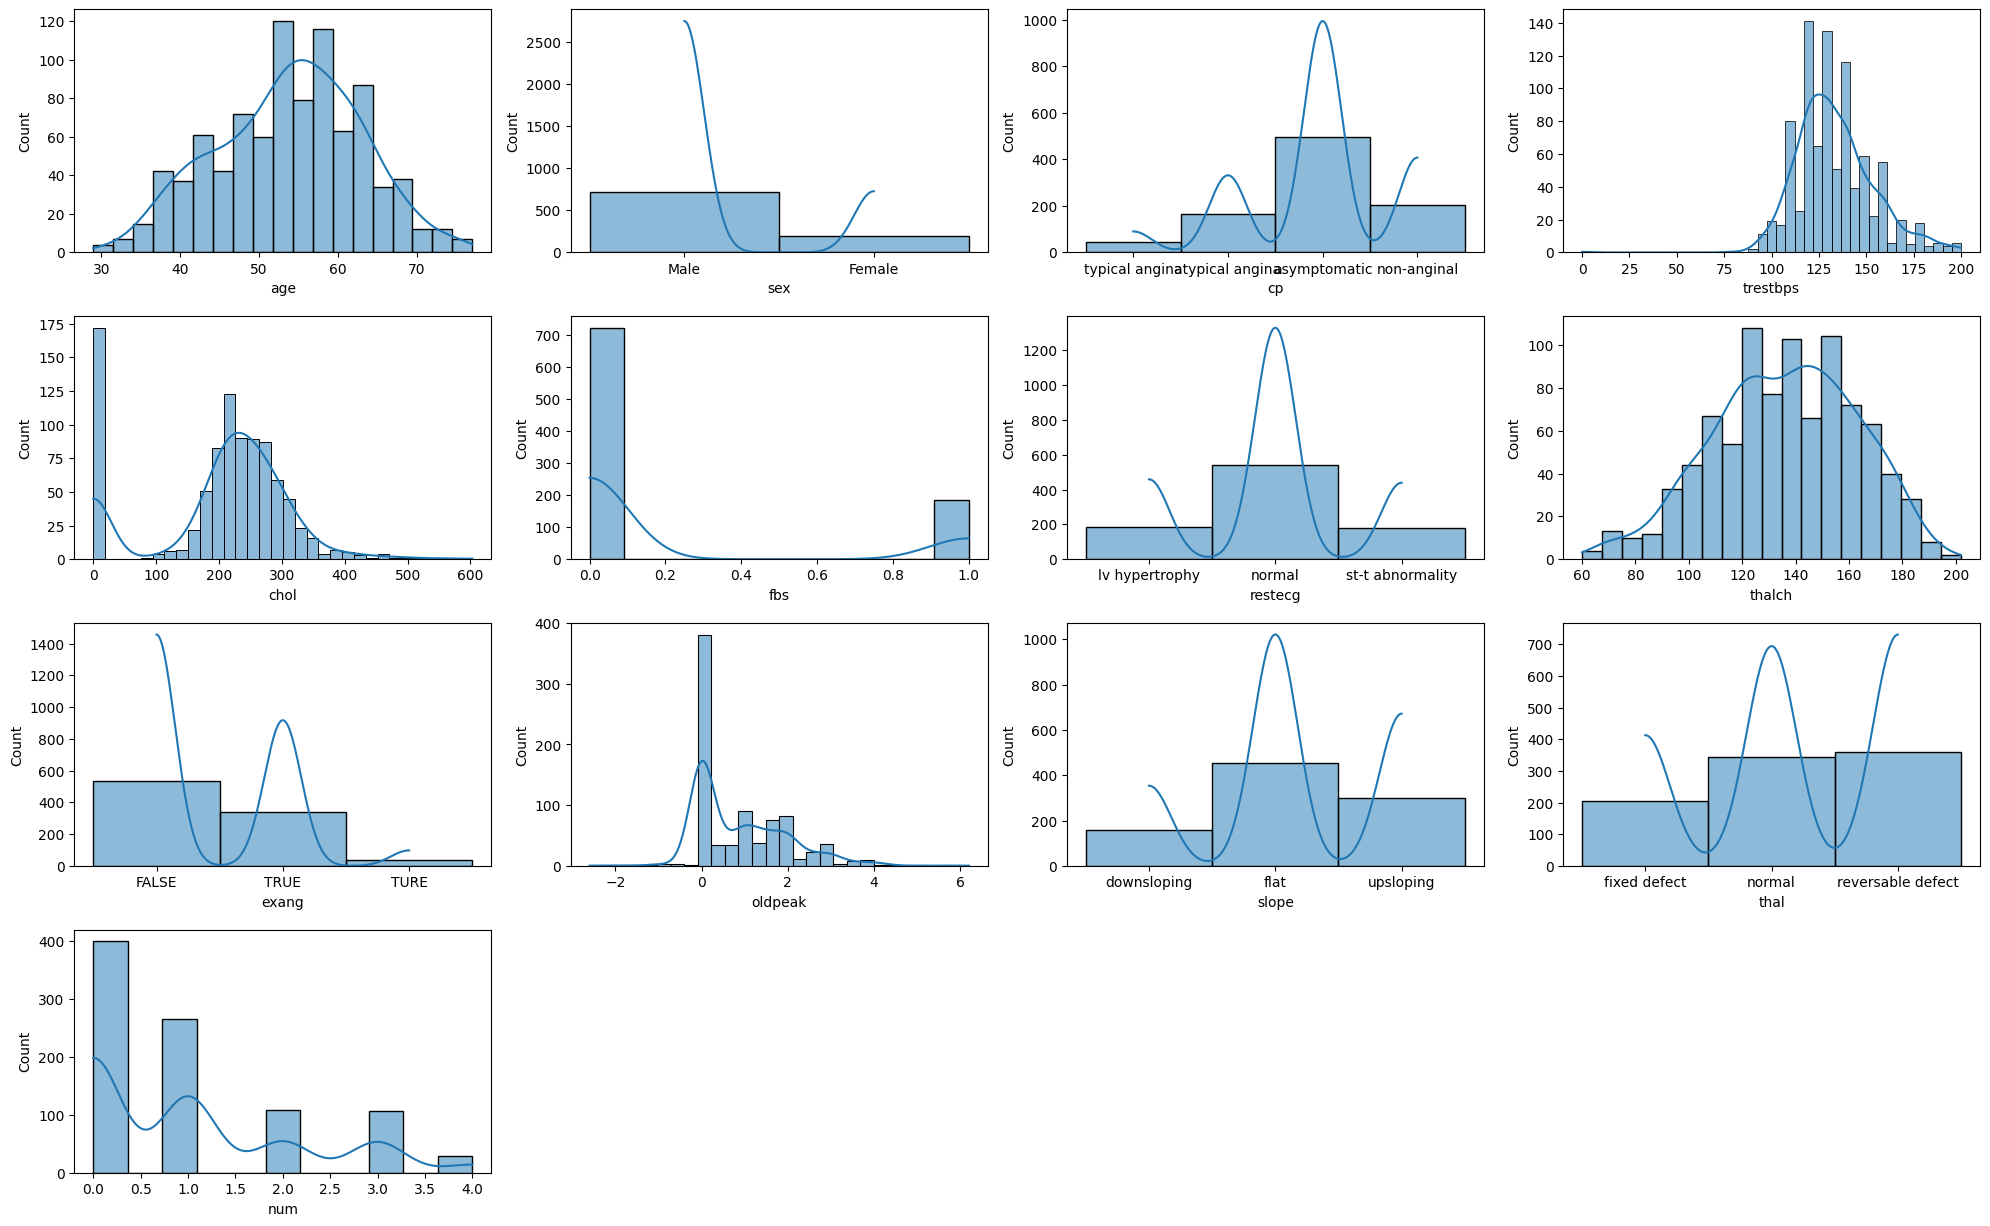

In [197]:
plt.figure(figsize=(20,15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[column], kde=True)
plt.tight_layout()
plt.show()


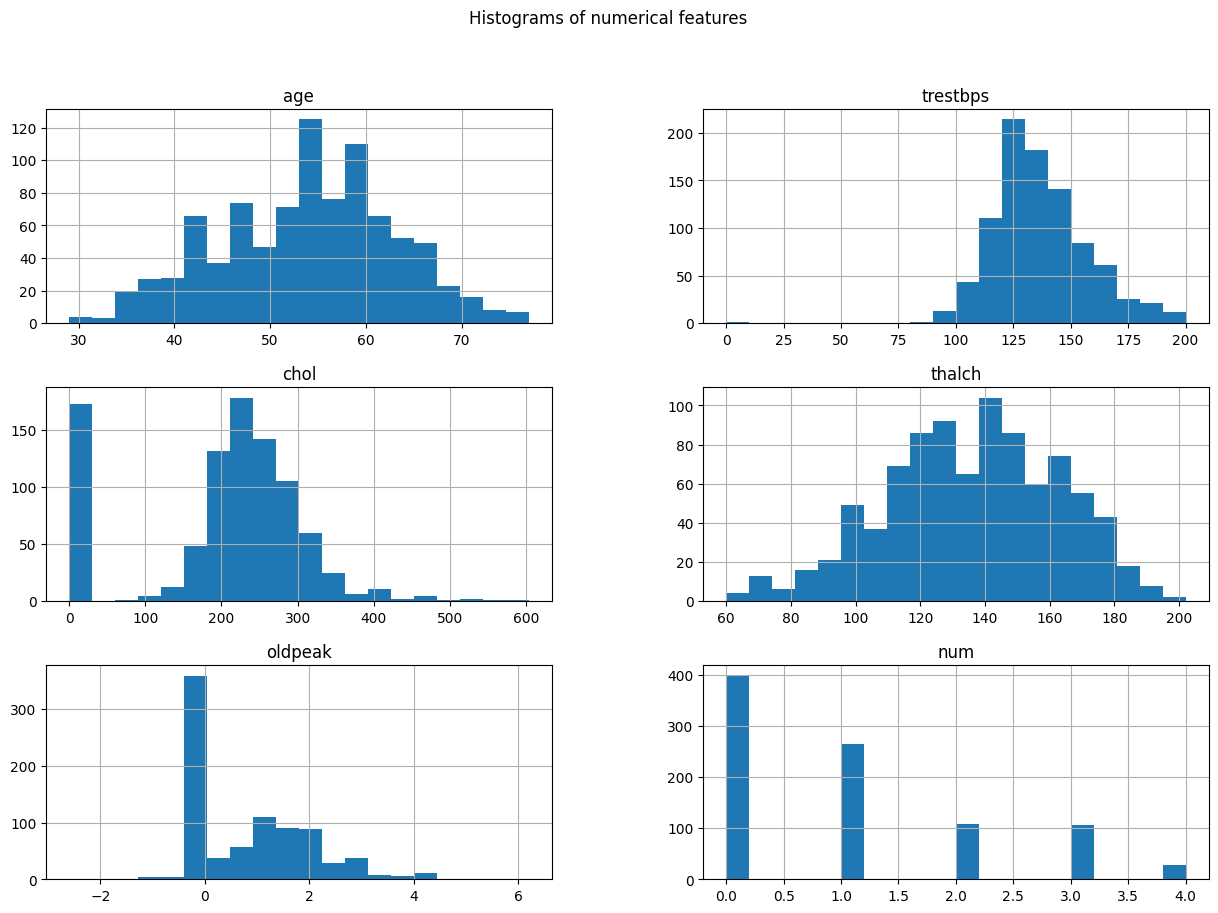

In [198]:
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of numerical features')
plt.show()


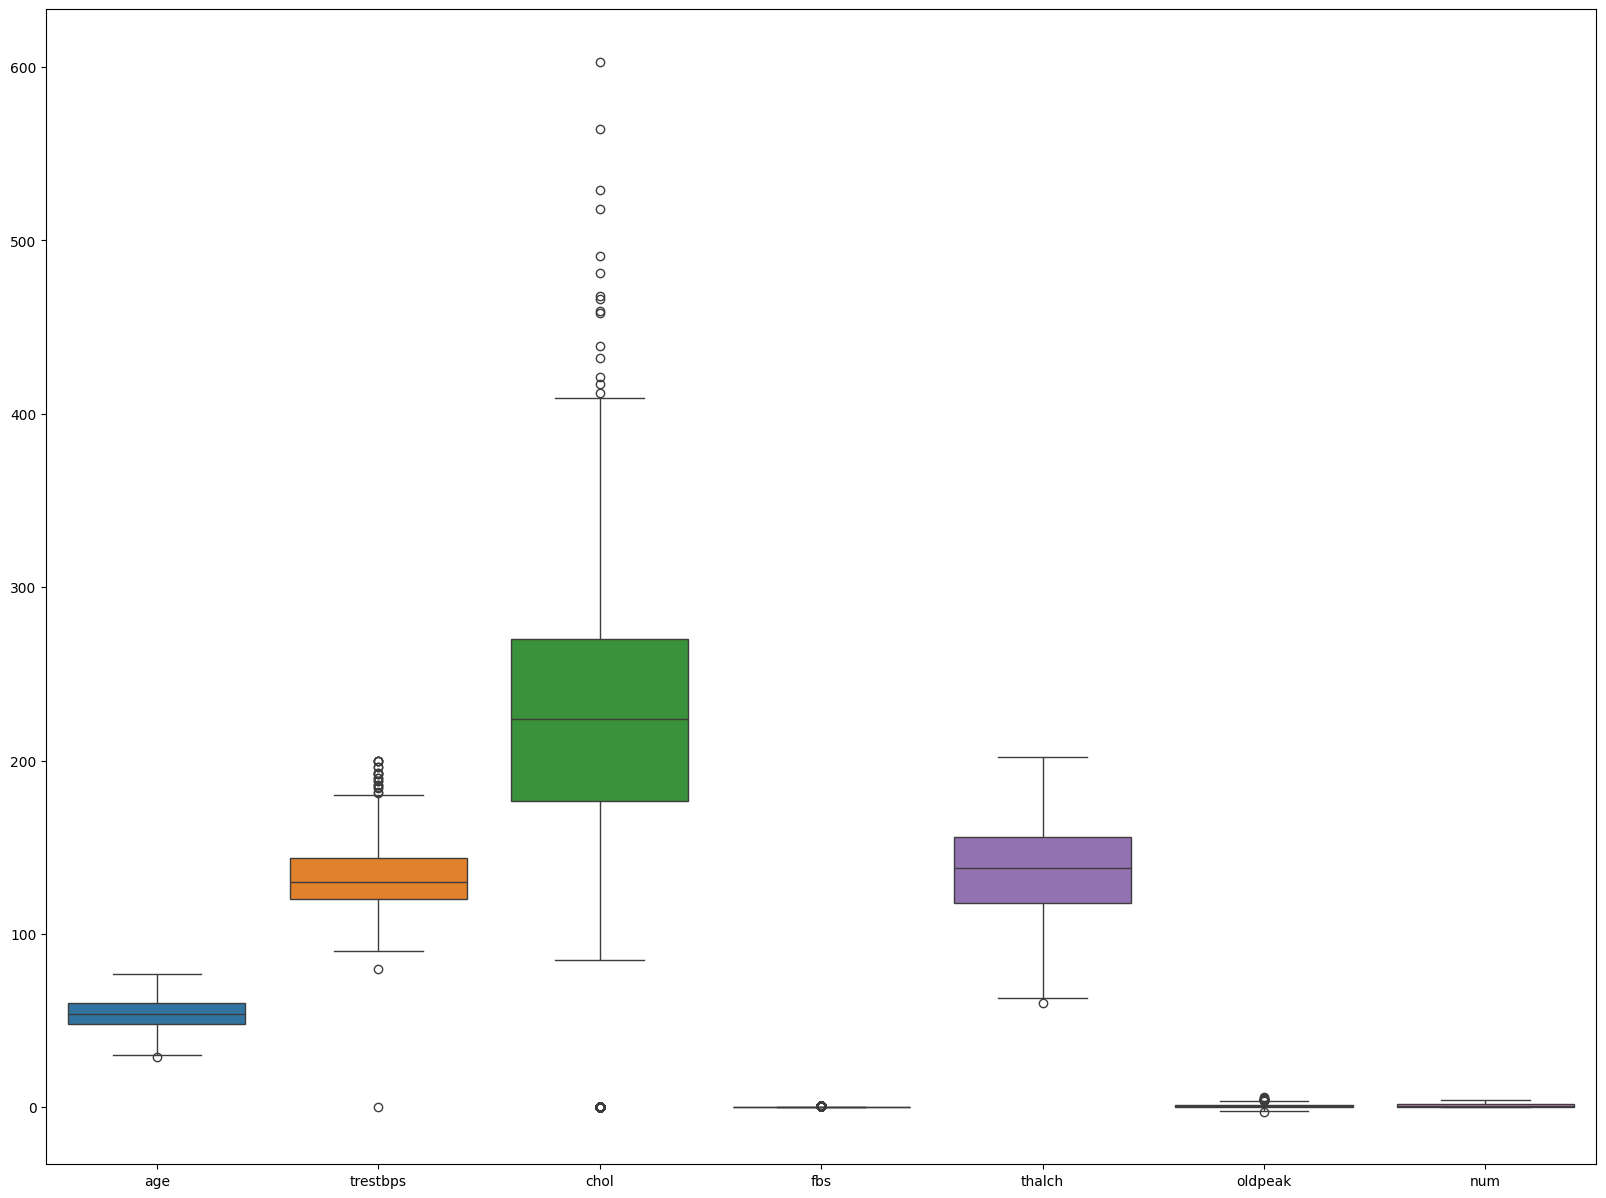

In [199]:
plt.figure(figsize=(20,15))
sns.boxplot(data=data)
plt.show()

In [200]:
corrlation_matrix =data_encoded.corr()
corrlation_matrix

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493,0.052194,-0.184616,-0.021009,0.036794,-0.226702,0.133759,0.143744,0.129797,0.073709,-0.079430,-0.054750,0.078219
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251,0.016441,-0.047210,-0.003035,0.045199,-0.118964,0.119733,0.093340,0.152101,0.061674,-0.027874,-0.024253,0.087358
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813,-0.191513,0.146071,0.003648,0.013506,-0.027488,-0.138215,-0.040070,0.005872,-0.010115,0.040165,0.085882,-0.027014
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268,0.092167,-0.075289,-0.035177,0.023074,-0.108306,0.120480,-0.015066,0.107410,0.025723,-0.033284,-0.067025,-0.014257
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058,-0.178794,0.221113,0.119954,0.080678,0.042430,-0.181896,-0.285956,-0.172429,-0.219650,0.281715,0.185247,-0.112265
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577,0.102397,-0.249744,-0.119488,0.042028,-0.114086,0.046001,0.385557,NaN,0.211097,-0.253649,-0.144918,0.120795
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000,0.259605,-0.335725,-0.161283,-0.054996,-0.166409,0.131716,0.344856,0.052714,0.163703,-0.196087,-0.228432,0.204258
sex_Male,0.052194,0.016441,-0.191513,0.092167,-0.178794,0.102397,0.259605,1.000000,-0.171833,-0.068376,0.005193,-0.014273,0.071157,0.154214,0.090647,0.020527,-0.044070,-0.219058,0.130227
cp_atypical angina,-0.184616,-0.047210,0.146071,-0.075289,0.221113,-0.249744,-0.335725,-0.171833,1.000000,-0.252872,-0.107609,0.107767,-0.046861,-0.267442,-0.037204,-0.087499,0.078147,0.104096,-0.073533
cp_non-anginal,-0.021009,-0.003035,0.003648,-0.035177,0.119954,-0.119488,-0.161283,-0.068376,-0.252872,1.000000,-0.122533,0.004451,-0.039991,-0.193378,0.039984,-0.123057,0.120340,0.099863,-0.063239


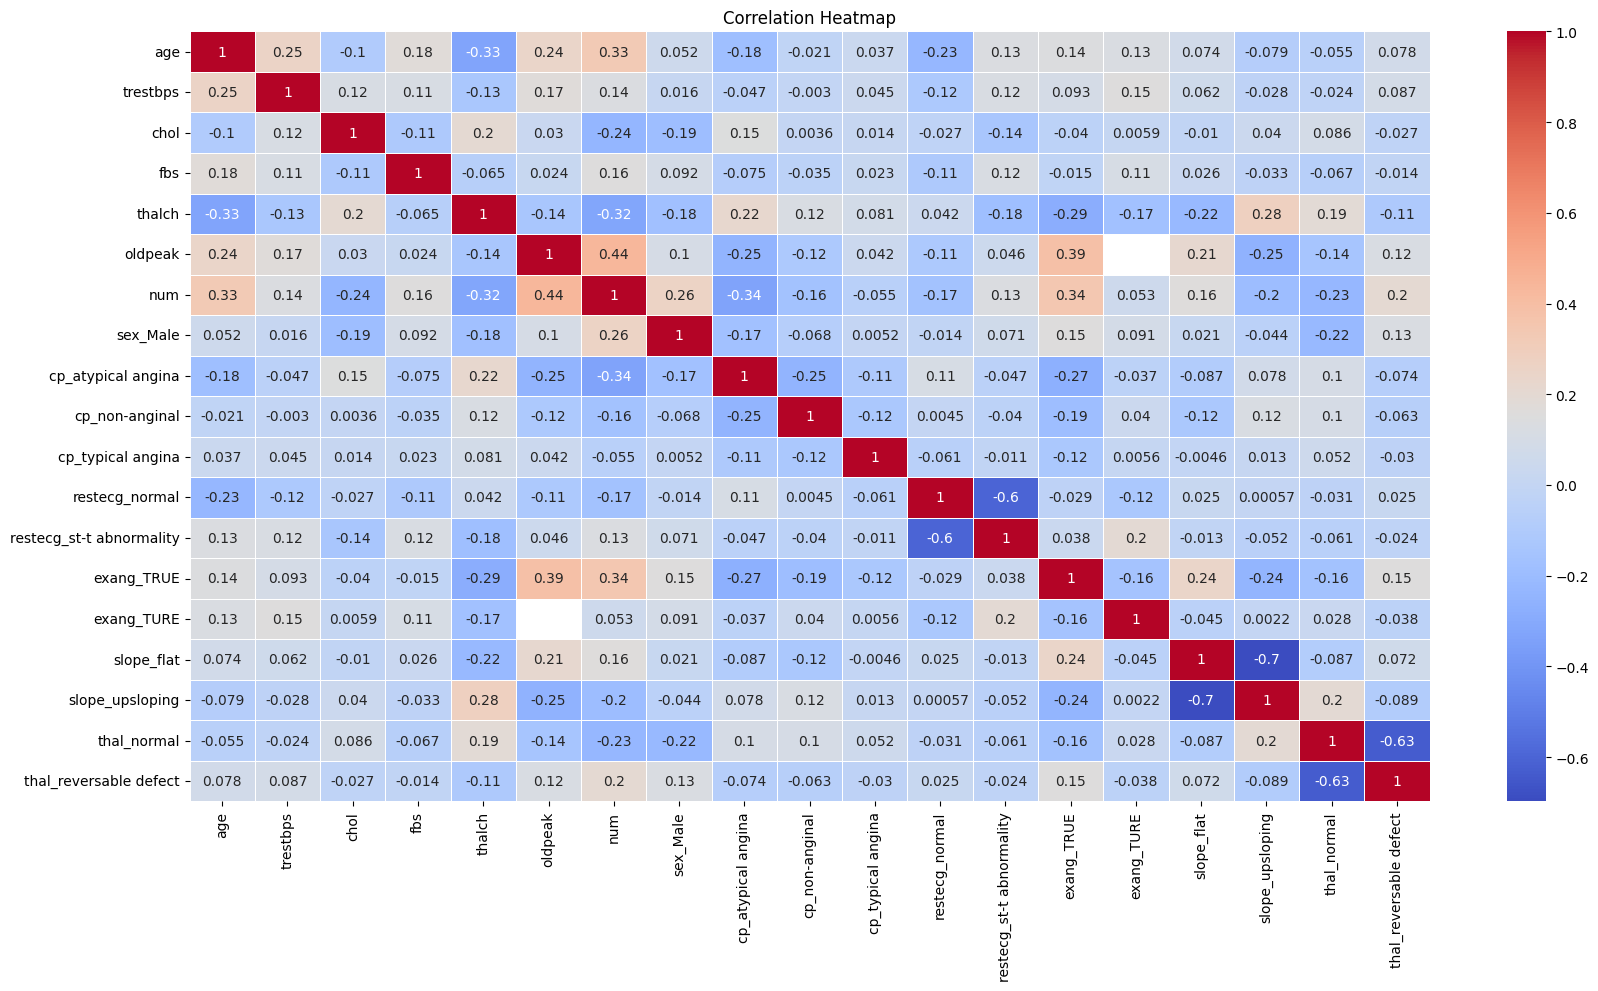

In [201]:
plt.figure(figsize=(20,10))
sns.heatmap(corrlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Handling Outliers

In [202]:
print(data_encoded.dtypes)


age                           int64
trestbps                      int64
chol                          int64
fbs                            bool
thalch                        int64
oldpeak                     float64
num                           int64
sex_Male                       bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
exang_TRUE                     bool
exang_TURE                     bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object


In [203]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
Q1 = data_encoded[numerical_columns].quantile(0.25)
Q3 = data_encoded[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data_encoded[~((data_encoded[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_encoded[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data after removing outliers:\n", data_cleaned.shape)



Data after removing outliers:
 (692, 19)


# Feature Engineering

In [204]:
data_cleaned.isnull().sum()

,0
age,0
trestbps,0
chol,0
fbs,0
thalch,0
oldpeak,38
num,0
sex_Male,0
cp_atypical angina,0
cp_non-anginal,0


In [205]:
data_cleaned=data_cleaned.dropna(subset=['oldpeak'])

In [206]:
data_cleaned['oldpeak'].fillna(data_cleaned['oldpeak'].median(), inplace=True)

In [207]:
data_cleaned.isnull().sum()

,0
age,0
trestbps,0
chol,0
fbs,0
thalch,0
oldpeak,0
num,0
sex_Male,0
cp_atypical angina,0
cp_non-anginal,0


In [208]:
data_encoded=pd.get_dummies(data_cleaned, drop_first=True)

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [210]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])


Spliting dataset into train and test sets

In [211]:
x=data_encoded.drop('num',axis=1)
y=data_encoded['num']


In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,accuracy_score

In [214]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [215]:
y_pred = model.predict(X_test)

In [216]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[54 15  7  1  1]
 [ 6 14  3  3  0]
 [ 4  2  2  2  0]
 [ 2  7  1  3  0]
 [ 2  1  0  0  1]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        78
           1       0.36      0.54      0.43        26
           2       0.15      0.20      0.17        10
           3       0.33      0.23      0.27        13
           4       0.50      0.25      0.33         4

    accuracy                           0.56       131
   macro avg       0.43      0.38      0.39       131
weighted avg       0.60      0.56      0.58       131

0.5648854961832062


# Hyperparameter Tuning

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [218]:
param_grid={
    'max_depth':[3,5,7,10],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}


In [219]:
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')

In [220]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [221]:
best_model=grid_search.best_estimator_
print("best paramater:",grid_search.best_params_)

best paramater: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [222]:
y_pred_best=best_model.predict(X_test)
print("best model accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test,y_pred_best))

best model accuracy: 0.648854961832061
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        78
           1       0.39      0.58      0.47        26
           2       0.40      0.20      0.27        10
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4

    accuracy                           0.65       131
   macro avg       0.31      0.33      0.31       131
weighted avg       0.57      0.65      0.60       131



Futher Optimiztion

In [223]:
param_grid={
    'max_depth':[3,5,7,10,15],
    'min_samples_split':[2,5,10,15],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[1,2,4]
}


In [224]:
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [225]:
best_model=grid_search.best_estimator_
print("best parameters:",grid_search.best_params_)

best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [226]:
y_pred_best=best_model.predict(X_test)

In [227]:
print("best model accuracy:", accuracy_score(y_test,y_pred_best))
print(classification_report(y_test,y_pred_best))

best model accuracy: 0.648854961832061
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        78
           1       0.39      0.58      0.47        26
           2       0.40      0.20      0.27        10
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4

    accuracy                           0.65       131
   macro avg       0.31      0.33      0.31       131
weighted avg       0.57      0.65      0.60       131



# Model Evulation and Analysis

In [228]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [229]:
smote=SMOTE(random_state=42)
X_train_balanced,y_train_balanced=smote.fit_resample(X_train,y_train)

In [230]:
best_model_smote = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
best_model_smote.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [231]:
y_pred_smote = best_model_smote.predict(X_test)
print("SMOTE Balanced Model Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


SMOTE Balanced Model Accuracy: 0.4351145038167939
              precision    recall  f1-score   support

           0       0.79      0.54      0.64        78
           1       0.29      0.50      0.37        26
           2       0.14      0.10      0.12        10
           3       0.06      0.08      0.07        13
           4       0.00      0.00      0.00         4

    accuracy                           0.44       131
   macro avg       0.26      0.24      0.24       131
weighted avg       0.55      0.44      0.47       131



In [232]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train: (523, 18)
X_test: (131, 18)
y_train: (523,)
y_test: (131,)


In [233]:
X_train.head()


,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
349,-1.964736,1.032757,0.402984,False,1.122582,-0.860390,True,True,False,False,True,False,False,False,False,True,False,False
555,0.128534,-0.136402,-0.807312,True,-1.168116,1.183174,True,False,False,False,True,False,True,False,True,False,False,False
370,-1.524048,-1.305561,-1.197730,False,1.613446,-0.860390,False,False,True,False,False,True,False,False,False,False,False,False
30,-1.524048,0.331262,-0.455935,False,0.468097,-0.860390,False,False,True,False,True,False,False,False,True,False,True,False
725,1.781116,-0.604066,-0.534019,True,-2.313464,-0.860390,True,False,False,False,False,False,True,False,False,False,False,True


In [234]:
from sklearn.tree import plot_tree

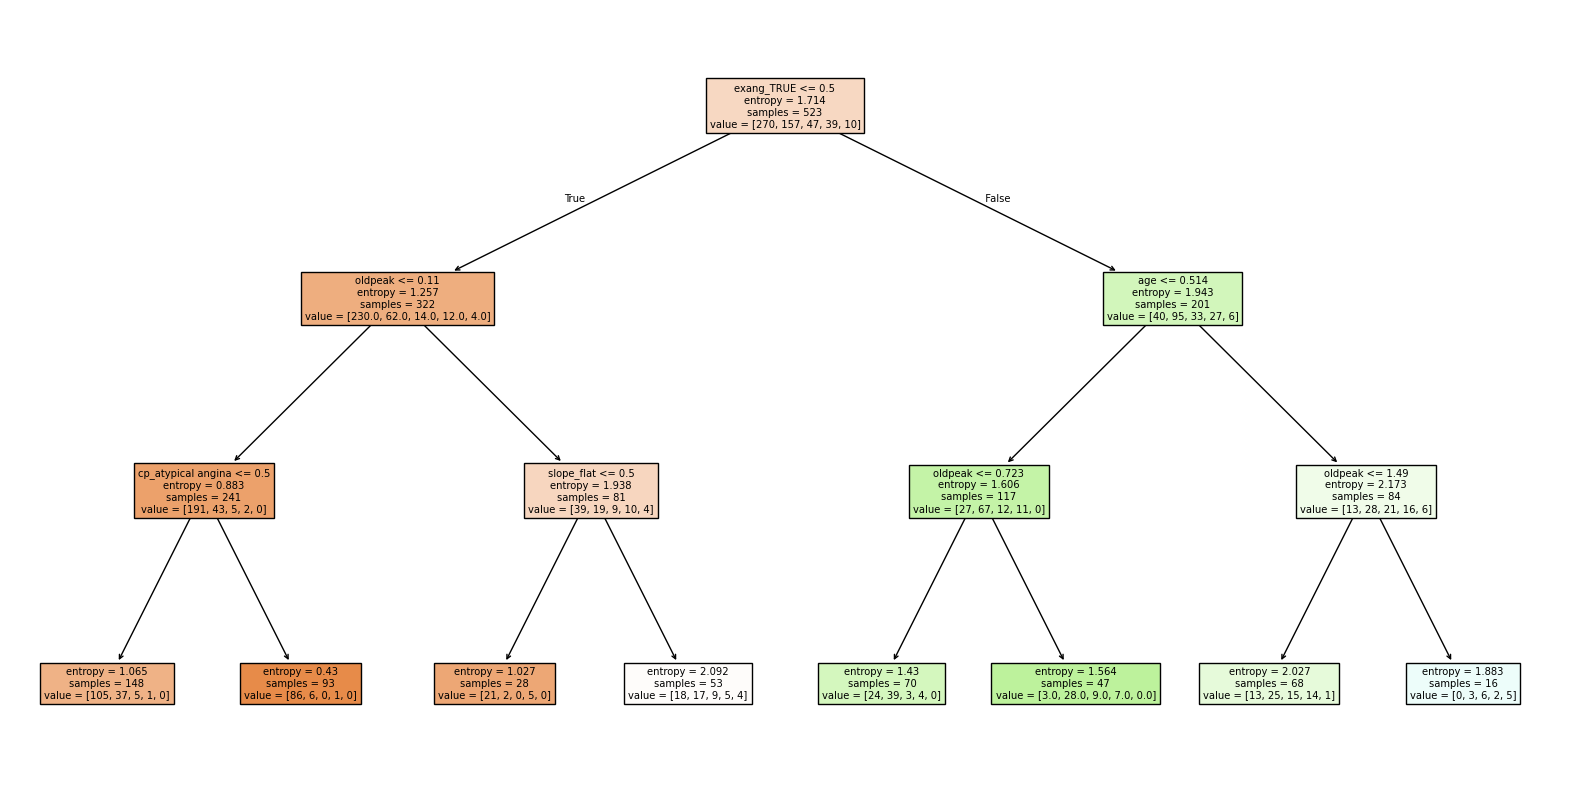

In [235]:
plt.figure(figsize=(20,10))
plot_tree(best_model,feature_names=X_train.columns, filled=True)
plt.show()

# Interview Questions:

**What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Common hyperparameters for Decision Trees include max depth, which limits the tree's growth to prevent overfitting; min samples split, determining the minimum number of samples required to split a node; and criterion, which specifies the function for measuring the quality of splits, such as Gini impurity or entropy. Tuning these parameters helps balance the model's complexity and generalization ability.

**What is the difference between the Label encoding and One-hot encoding?**


**Label Encoding:** converts categorical values into numerical labels, introducing potential ordinal relationships.

**One-hot Encoding:** transforms each category into a binary vector, avoiding any implied order but increasing dimensionality. The choice between them depends on whether the categories have a meaningful order and the specific requirements of the machine learning model.

